In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import tensorflow as tf

In [4]:
data = pd.read_csv('fraudTest.csv', index_col=0)


In [5]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
# Encoding
for col in data.columns:
    if data[col].dtype == 'object':  # Check if the column is of type 'object' (usually string)
        data[col] = data[col].astype('category').cat.codes  # Convert strings to unique integer codes

# Display the first few rows to check the changes
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,319,10,2.86,151,115,1,341,157,...,33.9659,-80.9355,333497,275,376,98699,1371816865,33.986391,-81.200714,0
1,1,3573030041201292,591,10,29.84,163,457,0,354,16,...,40.3207,-110.4360,302,392,760,108785,1371816873,39.450498,-109.960431,0
2,2,3598215285024754,611,5,41.28,24,249,0,865,61,...,40.6729,-73.5365,34496,259,421,433979,1371816893,40.495810,-74.196111,0
3,3,3591919803438423,222,9,60.05,42,457,1,320,764,...,28.5697,-80.8191,54767,407,718,71993,1371816915,28.812398,-80.883061,0
4,4,3526826139003047,292,13,3.19,247,261,1,548,247,...,44.2529,-85.0170,1126,196,177,190585,1371816917,44.959148,-85.884734,0


In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])


Number of Rows 555719
Number of Columns 22


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  int32  
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  int16  
 3   category               555719 non-null  int8   
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  int16  
 6   last                   555719 non-null  int16  
 7   gender                 555719 non-null  int8   
 8   street                 555719 non-null  int16  
 9   city                   555719 non-null  int16  
 10  state                  555719 non-null  int8   
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

In [10]:
data.isnull().sum()
# # Fill categorical NaNs with a placeholder
#data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# Handle NaN values in numeric columns (fill with the mean)
#numeric_cols = data.select_dtypes(include=[np.number]).columns  # Get numeric columns
#data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [17]:
data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

## Data Balancing -SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Separate majority and minority classes
majority_class = data[data['is_fraud'] == 0]
minority_class = data[data['is_fraud'] == 1]

# Step 2: Undersample the majority class
desired_majority_size = 5000  # Adjust as needed
majority_undersampled = majority_class.sample(n=desired_majority_size, random_state=42)

# Step 3: Combine undersampled majority and all minority class data
balanced_initial = pd.concat([majority_undersampled, minority_class], ignore_index=True)

# Step 4: Apply SMOTE to this combined dataset
# Separate features and target
X_balanced = balanced_initial.drop(columns=['is_fraud'])
y_balanced = balanced_initial['is_fraud']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced_smote, y_balanced_smote = smote.fit_resample(X_balanced, y_balanced)

# Step 5: Combine the resampled data into a single DataFrame
balanced_data = pd.DataFrame(X_balanced_smote, columns=X_balanced.columns)
balanced_data['is_fraud'] = y_balanced_smote

# Verify the new class distribution
print("New class distribution:")
print(balanced_data['is_fraud'].value_counts())


New class distribution:
is_fraud
0    5000
1    5000
Name: count, dtype: int64


In [20]:
balanced_data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,537103,371226440126102,422,10,60.510000,297,236,0,801,517,...,38.9311,-89.2463,1810,371,502,9759,1388344623,39.205918,-88.295627,0
1,517971,6596735789587928,484,12,2.360000,296,457,1,96,799,...,44.9595,-93.8482,5619,260,222,283349,1388029564,44.826412,-93.239743,0
2,126886,30551643947183,406,5,5.550000,243,397,0,129,297,...,35.1836,-81.4552,5621,461,483,121556,1375655246,34.787130,-81.789226,0
3,348731,6011388901471808,194,4,115.800000,144,256,0,882,214,...,40.1151,-79.8627,427,286,131,174262,1383650992,39.342100,-80.375392,0
4,179294,6011348830550197,642,1,8.300000,280,218,1,147,71,...,33.4629,-86.7904,493806,294,588,186880,1377346098,33.627330,-87.257660,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,175168,30560609640617,181,9,964.874107,235,315,1,531,443,...,40.4931,-91.8912,519,460,334,268147,1377234031,40.853872,-92.215313,1
9996,393186,4972228199573984,454,4,410.267077,42,194,1,325,409,...,34.2691,-95.9685,861,369,245,290847,1385326615,34.384354,-96.366432,1
9997,381222,6538441737335434,141,7,527.476679,126,169,0,424,139,...,41.3851,-80.1752,606,145,867,416616,1384904003,41.685638,-79.583615,1
9998,473438,6011492816282597,322,11,863.025081,123,19,1,290,714,...,33.3398,-92.7442,2501,187,694,227586,1387102292,33.766053,-93.079550,1


In [21]:
balanced_data['is_fraud'].value_counts()

is_fraud
0    5000
1    5000
Name: count, dtype: int64

In [23]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  10000 non-null  int32  
 1   cc_num                 10000 non-null  int64  
 2   merchant               10000 non-null  int16  
 3   category               10000 non-null  int8   
 4   amt                    10000 non-null  float64
 5   first                  10000 non-null  int16  
 6   last                   10000 non-null  int16  
 7   gender                 10000 non-null  int8   
 8   street                 10000 non-null  int16  
 9   city                   10000 non-null  int16  
 10  state                  10000 non-null  int8   
 11  zip                    10000 non-null  int64  
 12  lat                    10000 non-null  float64
 13  long                   10000 non-null  float64
 14  city_pop               10000 non-null  int64  
 15  job

In [24]:
balanced_data.isnull().sum()


trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

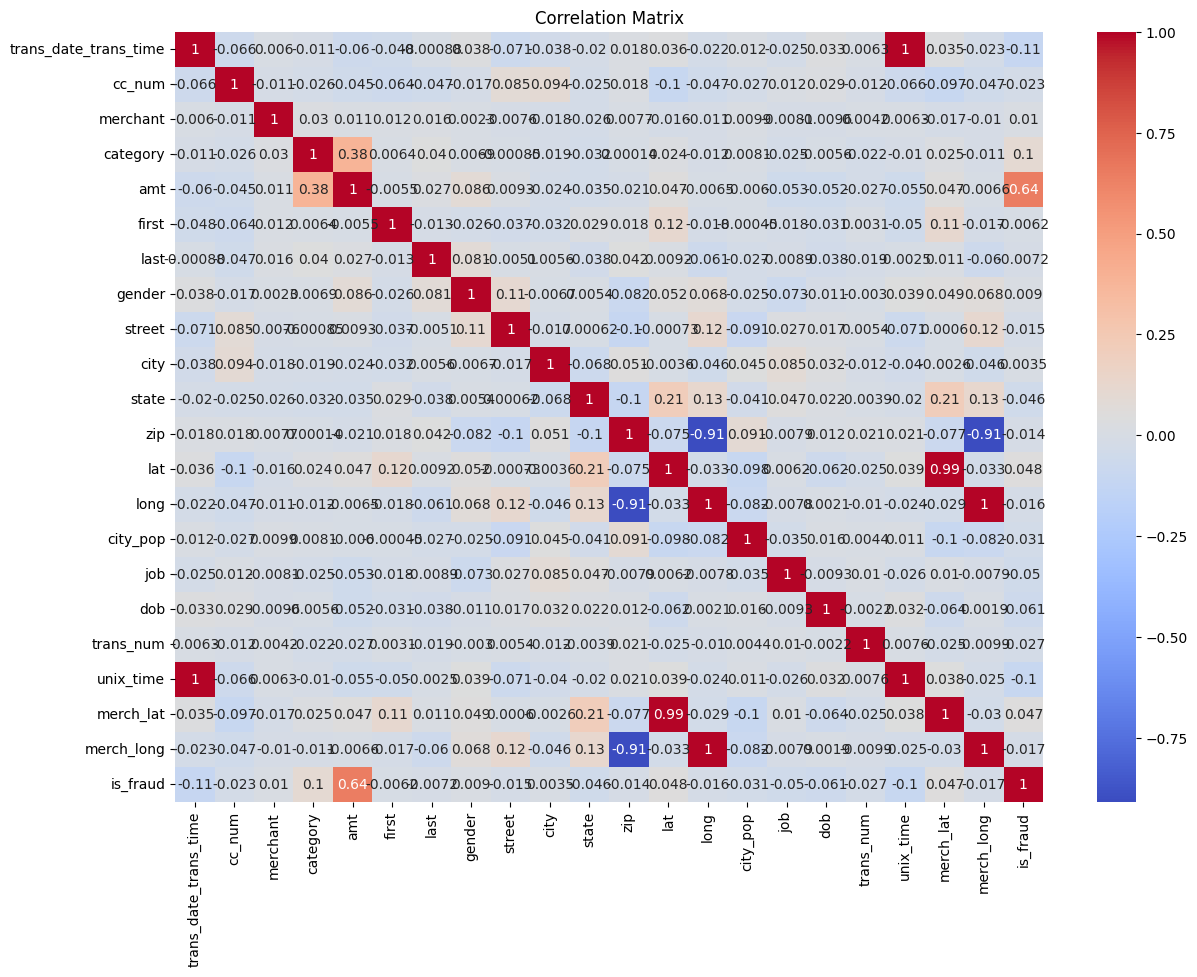

In [25]:
# 1. Correlation Matrix
correlation_matrix = balanced_data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Calculate the correlation matrix
correlation_matrix = balanced_data.corr()

# Extract correlation values specific to 'is_fraud'
fraud_correlation = correlation_matrix['is_fraud'].sort_values(ascending=False)

# Display the correlations with 'is_fraud'
print("Correlation of each feature with 'is_fraud':")
print(fraud_correlation)

Correlation of each feature with 'is_fraud':
is_fraud                 1.000000
amt                      0.643869
category                 0.104793
lat                      0.047898
merch_lat                0.047478
merchant                 0.010270
gender                   0.009029
city                     0.003538
first                   -0.006167
last                    -0.007166
zip                     -0.014131
street                  -0.014738
long                    -0.015675
merch_long              -0.016546
cc_num                  -0.022662
trans_num               -0.026865
city_pop                -0.030653
state                   -0.046471
job                     -0.049668
dob                     -0.061448
unix_time               -0.101963
trans_date_trans_time   -0.110389
Name: is_fraud, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20128\705288041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_correlation.index, y=fraud_correlation.values, palette="viridis")


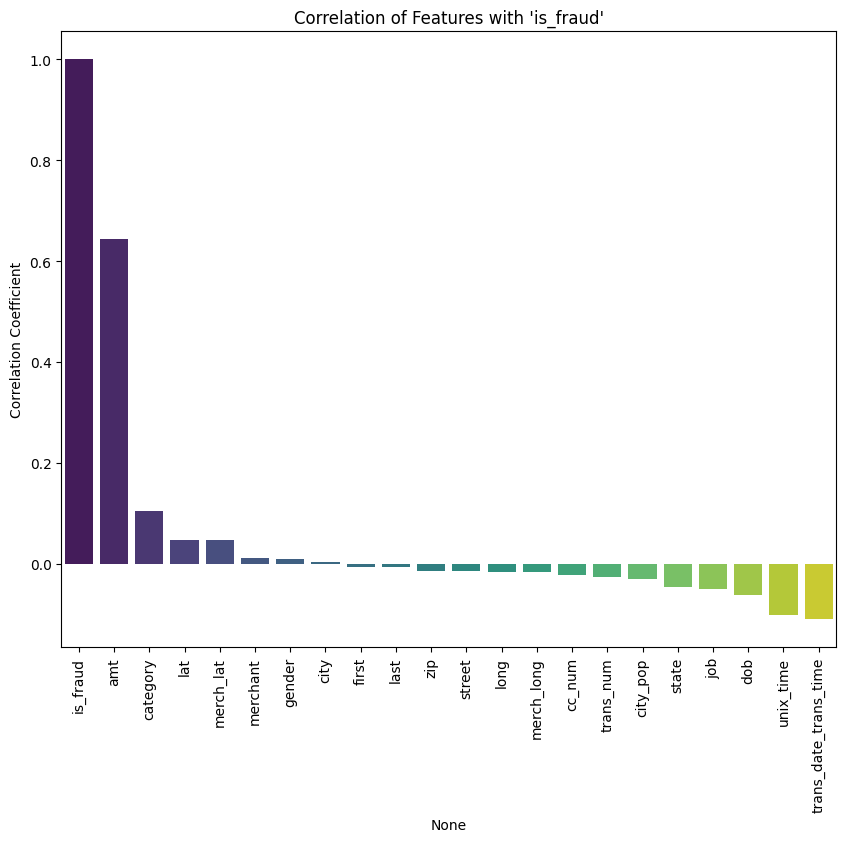

In [27]:
# Visualize the correlations with a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=fraud_correlation.index, y=fraud_correlation.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Correlation of Features with 'is_fraud'")
plt.ylabel("Correlation Coefficient")
plt.show()

In [1]:
import numpy as np

# Polynomial transformations
balanced_data['amt_squared'] = balanced_data['amt'] ** 2
balanced_data['amt_cubed'] = balanced_data['amt'] ** 3

# Interaction terms
balanced_data['amt_category_interaction'] = balanced_data['amt'] * balanced_data['category']
balanced_data['lat_merch_lat_interaction'] = balanced_data['lat'] * balanced_data['merch_lat']

# Log transformations (use np.log1p to avoid issues with zero values)
balanced_data['log_amt'] = np.log1p(balanced_data['amt'])
balanced_data['log_category'] = np.log1p(balanced_data['category'])

# Distance-based feature
balanced_data['distance_to_merchant'] = np.sqrt(
    (balanced_data['lat'] - balanced_data['merch_lat']) ** 2 + 
    (balanced_data['long'] - balanced_data['merch_long']) ** 2
)

# View updated correlations
updated_correlation = balanced_data.corr()['is_fraud'].sort_values(ascending=False)
print("Updated correlation with 'is_fraud':")
print(updated_correlation)

#distance_to_merchant = np.sqrt((lat - merch_lat)**2 + (long - merch_long)**2)
#amt_category_interaction = amt * category
#lat_merch_lat_interaction = lat * merch_lat
#log_amt = np.log1p(amt)
#log_category = np.log1p(category)
#amt_squared = amt ** 2


NameError: name 'balanced_data' is not defined

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20128\3481301236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=updated_correlation.index, y=updated_correlation.values, palette="viridis")


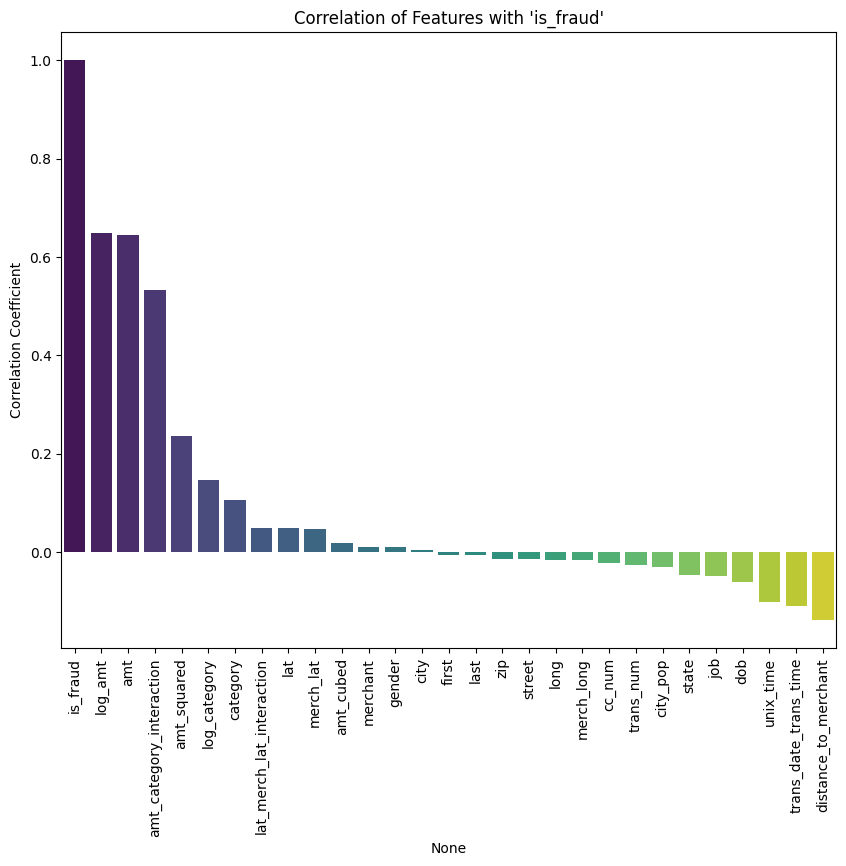

In [29]:
# Visualize the correlations with a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=updated_correlation.index, y=updated_correlation.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Correlation of Features with 'is_fraud'")
plt.ylabel("Correlation Coefficient")
plt.show()

In [30]:
# Set correlation threshold
correlation_threshold = 0.05

# Get the absolute correlations
correlations = balanced_data.corr()['is_fraud'].abs()

# Filter features with correlation above the threshold
important_features = correlations[correlations > correlation_threshold].index

# Create the new dataframe with only the important features
balanced_data_reduced = balanced_data[important_features]

# Display the new dataframe columns
print("Selected features for the new dataframe:")
print(balanced_data_reduced.columns)

# Show the new dataframe
balanced_data_reduced.head()


Selected features for the new dataframe:
Index(['trans_date_trans_time', 'category', 'amt', 'dob', 'unix_time',
       'is_fraud', 'amt_squared', 'amt_category_interaction', 'log_amt',
       'log_category', 'distance_to_merchant'],
      dtype='object')


,trans_date_trans_time,category,amt,dob,unix_time,is_fraud,amt_squared,amt_category_interaction,log_amt,log_category,distance_to_merchant
0,537103,10,60.51,502,1388344623,0,3661.4601,605.10,4.119200,2.398438,0.989598
1,517971,12,2.36,222,1388029564,0,5.5696,28.32,1.211941,2.564453,0.622842
2,126886,5,5.55,483,1375655246,0,30.8025,27.75,1.879465,1.791992,0.518422
3,348731,4,115.80,131,1383650992,0,13409.6400,463.20,4.760463,1.609375,0.927568
4,179294,1,8.30,588,1377346098,0,68.8900,8.30,2.230014,0.693359,0.495347


In [31]:
balanced_data_reduced['is_fraud'].value_counts()

is_fraud
0    5000
1    5000
Name: count, dtype: int64

## Spliting 

In [32]:
# Drop irrelevant columns (if any)
X = balanced_data_reduced.drop('is_fraud', axis=1)  # Features (replace 'Class' with the fraud column in your dataset)
y = balanced_data_reduced['is_fraud']  # Target (0 = Legitimate, 1 = Fraud)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
len(X_train_scaled) #due to train - test 


7000

In [38]:
y_train

9069    1
2603    0
7738    1
1579    0
5058    1
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: is_fraud, Length: 7000, dtype: int64

In [41]:
pd.Series(y_train).value_counts()

is_fraud
1    3537
0    3463
Name: count, dtype: int64

## Comparing Models

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.908000   0.897522  0.915926  0.906631
1                  SVM  0.875333   0.969802  0.768284  0.857361
2  Logistic Regression  0.872000   0.949958  0.778537  0.855748
3        Random Forest  0.936333   0.949788  0.917977  0.933611
4                  CNN  0.899667   0.934880  0.853725  0.892462


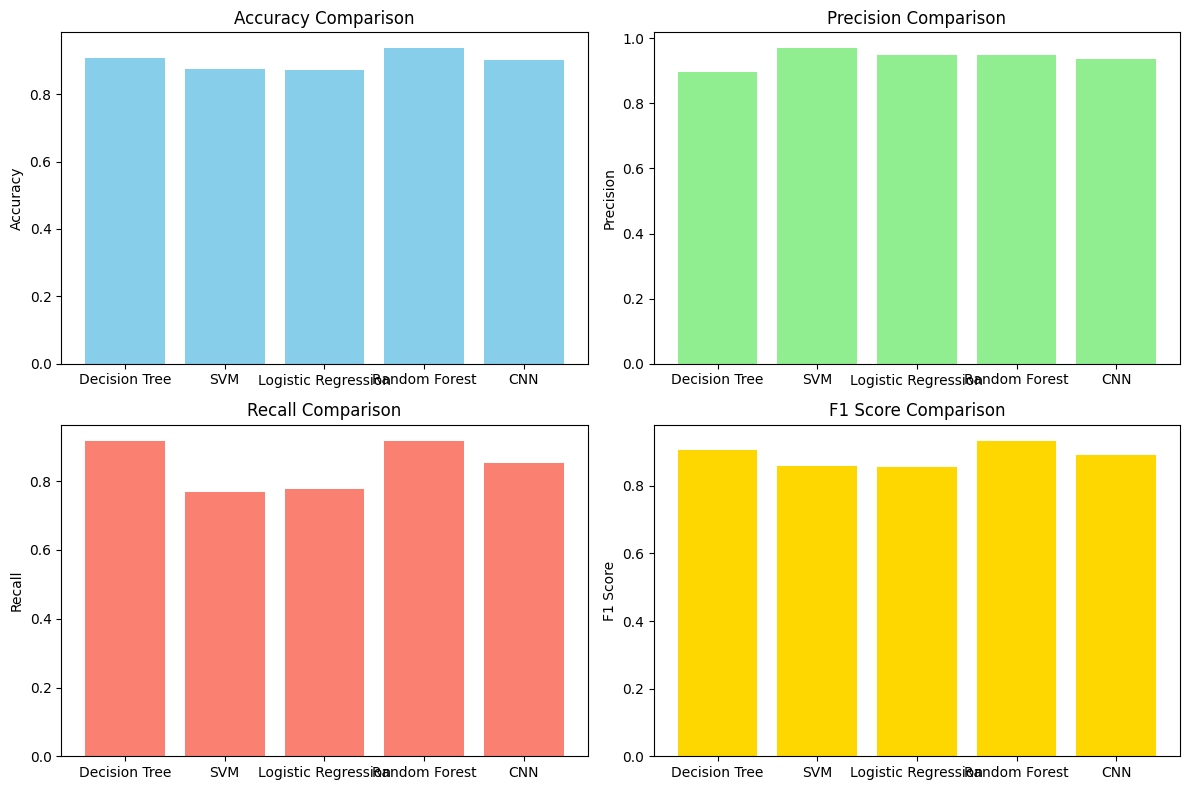

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
import pandas as pd

# Dictionary to store the evaluation metrics for each model
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Define the function to calculate metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Append to metrics dictionary
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Train and evaluate Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
evaluate_model(dt, X_test_scaled, y_test, 'Decision Tree')

# Train and evaluate SVM
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
evaluate_model(svm, X_test_scaled, y_test, 'SVM')

# Train and evaluate Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
evaluate_model(lr, X_test_scaled, y_test, 'Logistic Regression')

# Train and evaluate Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
evaluate_model(rf, X_test_scaled, y_test, 'Random Forest')

# Train and evaluate CNN
cnn = Sequential([
    Conv1D(64, 2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Prepare data for CNN (reshape for Conv1D)
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=5, batch_size=32, verbose=0)  # Set epochs and batch size as needed

# Get CNN predictions and evaluate
y_pred_cnn = (cnn.predict(X_test_cnn) > 0.5).astype("int32").flatten()
accuracy = accuracy_score(y_test, y_pred_cnn)
precision = precision_score(y_test, y_pred_cnn)
recall = recall_score(y_test, y_pred_cnn)
f1 = f1_score(y_test, y_pred_cnn)

# Append CNN results to metrics
metrics['Model'].append('CNN')
metrics['Accuracy'].append(accuracy)
metrics['Precision'].append(precision)
metrics['Recall'].append(recall)
metrics['F1 Score'].append(f1)

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame with results
print(metrics_df)

# Plot the results
plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

# Precision
plt.subplot(2, 2, 2)
plt.bar(metrics_df['Model'], metrics_df['Precision'], color='lightgreen')
plt.title('Precision Comparison')
plt.ylabel('Precision')

# Recall
plt.subplot(2, 2, 3)
plt.bar(metrics_df['Model'], metrics_df['Recall'], color='salmon')
plt.title('Recall Comparison')
plt.ylabel('Recall')

# F1 Score
plt.subplot(2, 2, 4)
plt.bar(metrics_df['Model'], metrics_df['F1 Score'], color='gold')
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.908000   0.897522  0.915926  0.906631
1                  SVM  0.875333   0.969802  0.768284  0.857361
2  Logistic Regression  0.872000   0.949958  0.778537  0.855748
3        Random Forest  0.936333   0.949788  0.917977  0.933611
4                  CNN  0.899667   0.934880  0.853725  0.892462
5        Decision Tree  0.908000   0.897522  0.915926  0.906631
6                  SVM  0.875333   0.969802  0.768284  0.857361
7  Logistic Regression  0.872000   0.949958  0.778537  0.855748
8        Random Forest  0.936333   0.949788  0.917977  0.933611
9                  CNN  0.890000   0.967795  0.801094  0.876589


<Figure size 1500x1200 with 0 Axes>

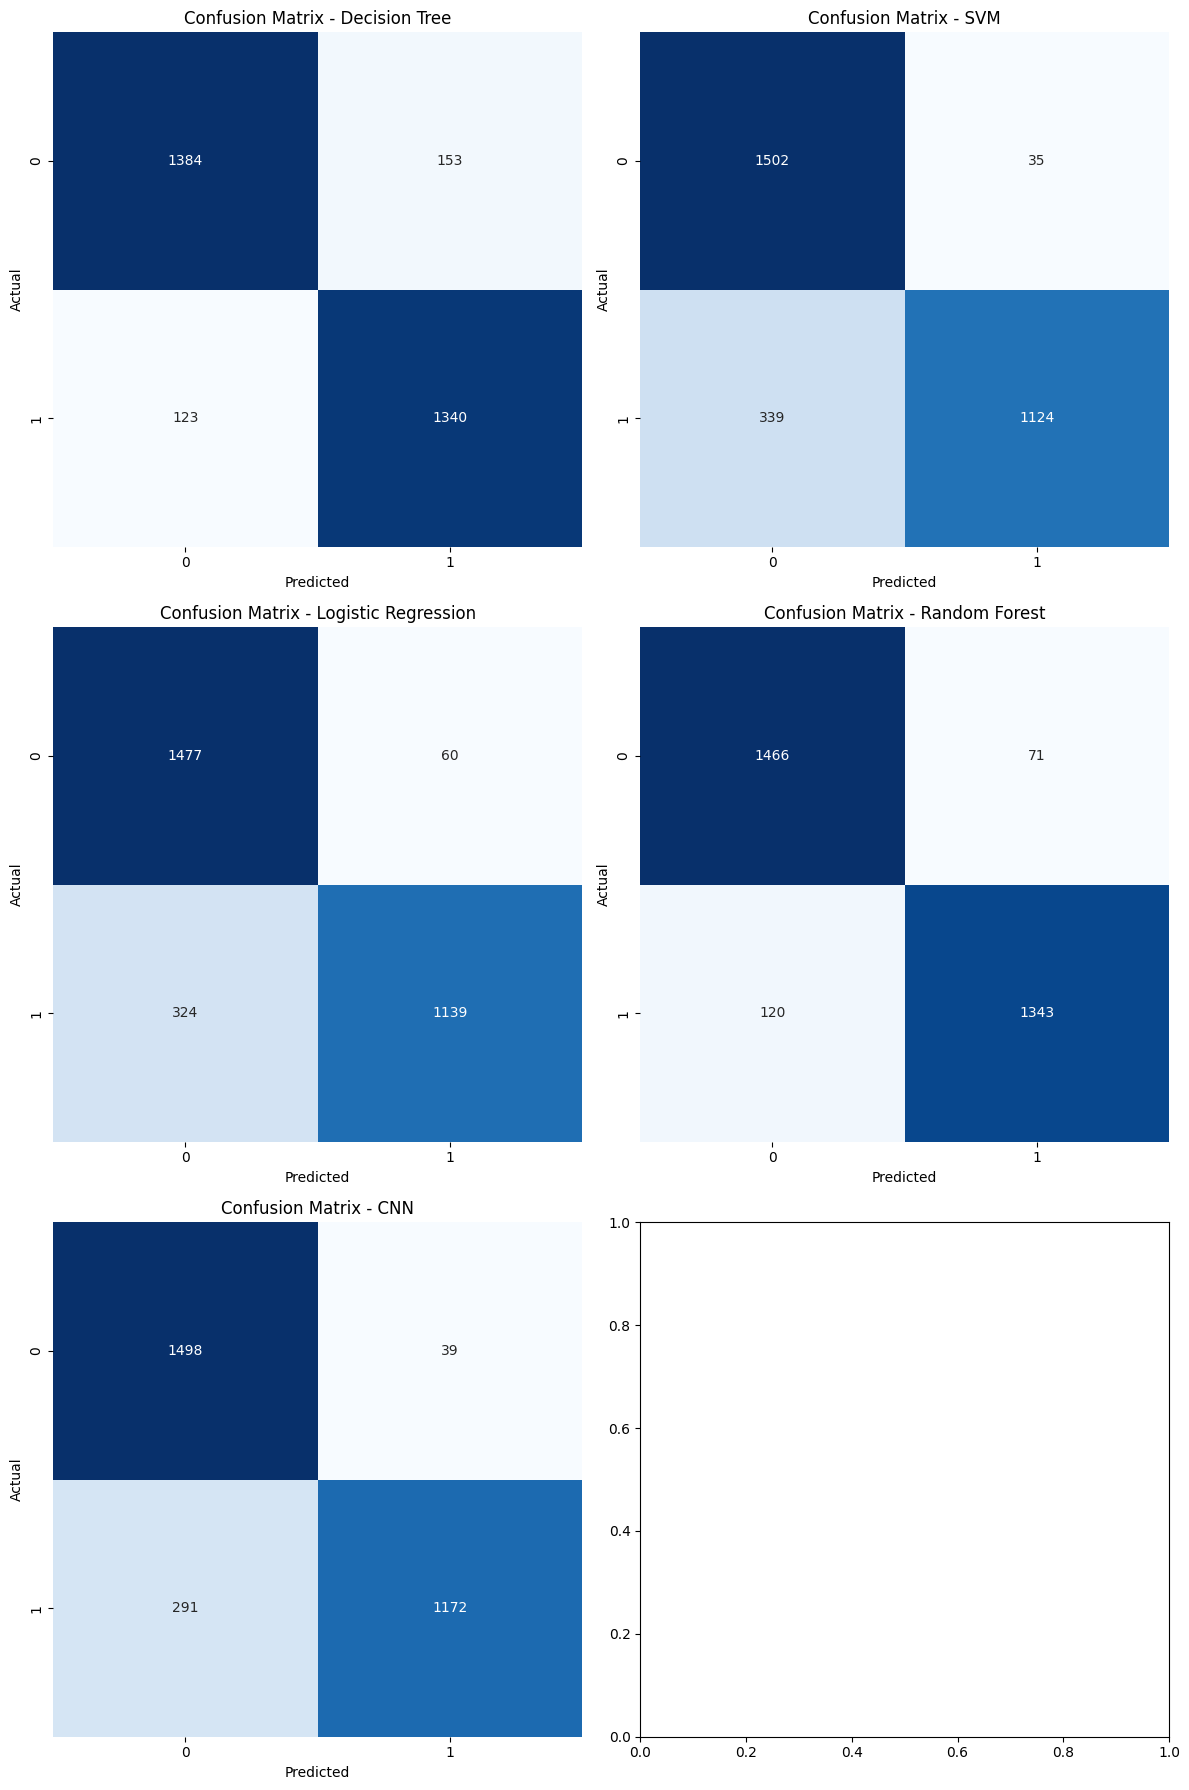

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Modify evaluate_model function to return y_pred for each model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append to metrics dictionary
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    
    return y_pred

# Initialize plot settings
plt.figure(figsize=(15, 12))

# Train and evaluate Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = evaluate_model(dt, X_test_scaled, y_test, 'Decision Tree')

# Train and evaluate SVM
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = evaluate_model(svm, X_test_scaled, y_test, 'SVM')

# Train and evaluate Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = evaluate_model(lr, X_test_scaled, y_test, 'Logistic Regression')

# Train and evaluate Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = evaluate_model(rf, X_test_scaled, y_test, 'Random Forest')

# Train and evaluate CNN
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

cnn = Sequential([
    Conv1D(64, 2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=5, batch_size=32, verbose=0)

y_pred_cnn = (cnn.predict(X_test_cnn) > 0.5).astype("int32").flatten()

# Evaluate and store CNN results
accuracy = accuracy_score(y_test, y_pred_cnn)
precision = precision_score(y_test, y_pred_cnn)
recall = recall_score(y_test, y_pred_cnn)
f1 = f1_score(y_test, y_pred_cnn)
metrics['Model'].append('CNN')
metrics['Accuracy'].append(accuracy)
metrics['Precision'].append(precision)
metrics['Recall'].append(recall)
metrics['F1 Score'].append(f1)

# Display the DataFrame with results
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plot confusion matrices
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Confusion matrices for each model
models_preds = {
    'Decision Tree': y_pred_dt,
    'SVM': y_pred_svm,
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'CNN': y_pred_cnn
}

for i, (model_name, y_pred) in enumerate(models_preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    ax = axs[i // 2, i % 2]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()
